# Load

In [171]:
using Plots
using NBInclude
using LaTeXStrings
#using IterTools
using Printf
#using IterTools
#using GLM
using Statistics
using InvertedIndices
using BenchmarkTools
using Pipe

In [172]:
#@nbinclude("../L4/List4.ipynb");

# Zadanka

## Func

In [173]:
Set([1,2,3,3]) |> length

3

In [174]:
hcat([[1,2,3,4].^i for i in 0:3]...)

4×4 Matrix{Int64}:
 1  1   1   1
 1  2   4   8
 1  3   9  27
 1  4  16  64

In [175]:
interpolacjon(X,Y)=begin
    length(X) != length(Y) && error("Nie dziołczy")
    length(X) != length(Set(X)) && error("To również...")
    hcat([X.^i for i in 0:length(X)-1]...) \Y
end

interpolacjon (generic function with 1 method)

In [192]:
n=4
inter=rand(n)
a=rand(Int8,n)
f(x,a) =  a' * [x^i for i in 0:length(a)-1] 

f (generic function with 1 method)

In [193]:
f(0,a)

31

In [194]:
a

4-element Vector{Int8}:
  31
  54
  62
 113

In [198]:
@pipe interpolacjon(inter,f.(inter,Ref(a))) .|> round(_,digits=10) #YAY!

4-element Vector{Float64}:
  31.0
  54.0
  62.0
 113.0

## Zad 1

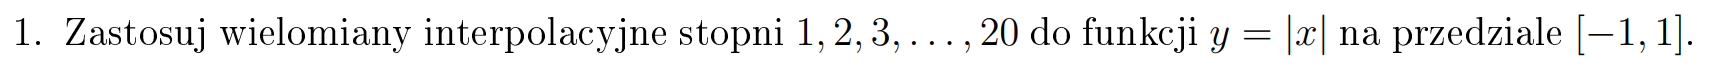

In [199]:
a=[]
for n in 1:20
    inter=-1:(2/n):1 # równomierne między -1 i 1 z końcami przedziału
    push!(a,interpolacjon(inter,abs.(inter)))
end

In [200]:
anim=@animate for i in 1:20
    plot(-1:1:1,x->abs(x))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_05eeZk", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png", "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png"])

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
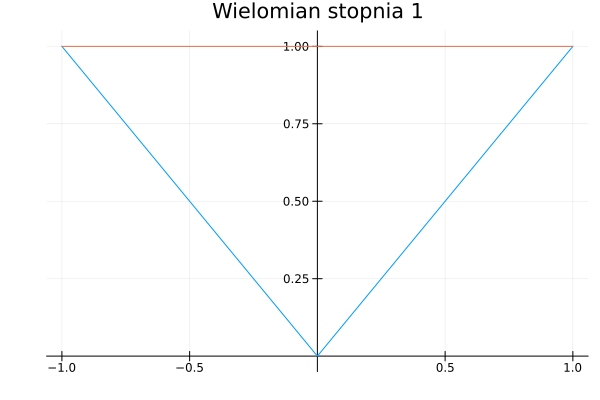

In [201]:
gif(anim, fps=3)

In [202]:
[a[i][2:2:end] .|> abs |> maximum  for i in 1:20] # największy (co do modułu) współczynnik przy nieparzystych potęgach

20-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 3.2526065174565123e-16
 2.9976021664879227e-15
 2.8426610024223675e-14
 8.661854302599316e-14
 4.1179542381011443e-13
 6.059485475113417e-12
 1.987154200781273e-11
 5.4107301496386995e-11
 7.08418581163727e-10
 2.9512079142234405e-9
 1.3568476084545857e-9
 1.5704599968219892e-8
 1.3874907837781516e-6
 4.551944527771415e-5
 3.258764298542432e-5
 0.001916974236124289

Dla nieparzystych mamy lepsze oszacowanie, bo dostajemy wielomian stopnia parzystego, ale mamy więcej punktów wziętych pod uwagę

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
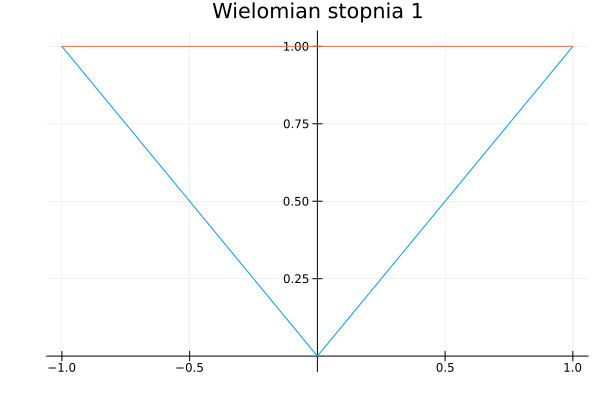

In [203]:
a=[]#interpolacjon([0],[0])]
for n in 1:20
    inter=-1:(2/n):1 .|> (x->sign(x) * abs(x)^2) # punkty skoncentrowane gęściej w 0
    push!(a,interpolacjon(inter,abs.(inter)))
end
anim=@animate for i in 1:20
    plot(-1:1:1,x->abs(x))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end
gif(anim, fps=3)

Beznadziejnie

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
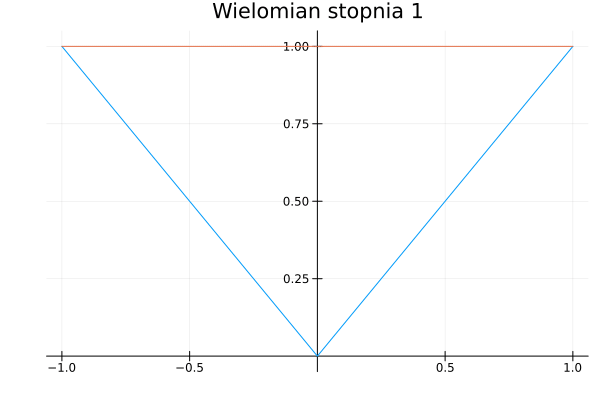

In [204]:
a=[]#interpolacjon([0],[0])]
for n in 1:20
    inter=-1:(2/n):1 .|> (x->sign(x) * abs(x)^(1/2)) # punkty skoncentrowane gęściej na obrzeżach
    push!(a,interpolacjon(inter,abs.(inter)))
end
anim=@animate for i in 1:20
    plot(-1:1:1,x->abs(x))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end
gif(anim, fps=3)

Wyniki bardzo fajne

## Zad 2

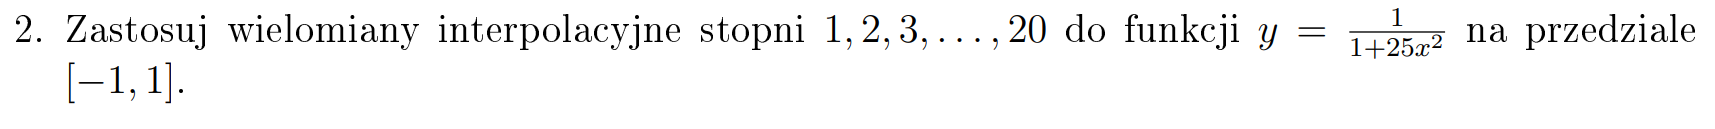

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
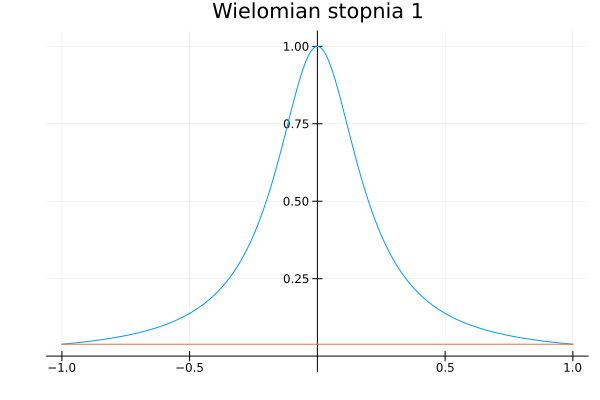

In [205]:
a=[]#interpolacjon([0],[0])]
for n in 1:20
    inter=-1:(2/n):1 .|> (x->sign(x) * abs(x)) # punkty rozłożone równomiernie
    push!(a,interpolacjon(inter,(x->1/(1+25x^2)).(inter)))
end
anim=@animate for i in 1:20
    plot(-1:0.01:1,x->1/(1+25x^2))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end
gif(anim, fps=3)

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
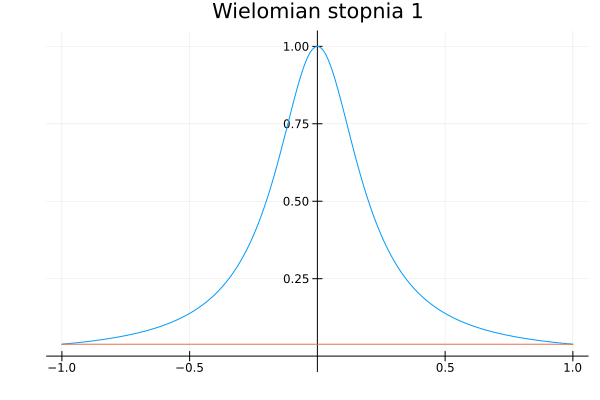

In [206]:
a=[]#interpolacjon([0],[0])]
for n in 1:20
    inter=-1:(2/n):1 .|> (x->sign(x) * abs(x)^2) # punkty skoncentrowane gęściej w 0
    push!(a,interpolacjon(inter,(x->1/(1+25x^2)).(inter)))
end
anim=@animate for i in 1:20
    plot(-1:0.01:1,x->1/(1+25x^2))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end
gif(anim, fps=3)

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
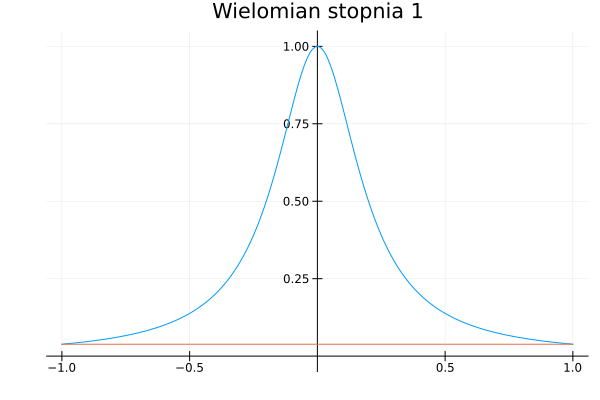

In [207]:
a=[]#interpolacjon([0],[0])]
for n in 1:20
    inter=-1:(2/n):1 .|> (x->sign(x) * abs(x)^(1/2)) # punkty skoncentrowane gęściej na obrzeżach
    push!(a,interpolacjon(inter,(x->1/(1+25x^2)).(inter)))
end
anim=@animate for i in 1:20
    plot(-1:0.01:1,x->1/(1+25x^2))
    plot!(x->a[i]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
end
gif(anim, fps=3)

Znowu najlepiej dopapsowywać na obrzeżach

In [208]:
a=([ ((-5im)^n + (5im)^n) for n in 0:20] .|> real)./2; # współczynniki szeregu w 0 (zbieżne jedynie, gdy |x|<1/5)

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L5\tmp.gif


Plots.AnimatedGif("C:\\Git\\Numeryczne-Teoretyczne\\L5\\tmp.gif")
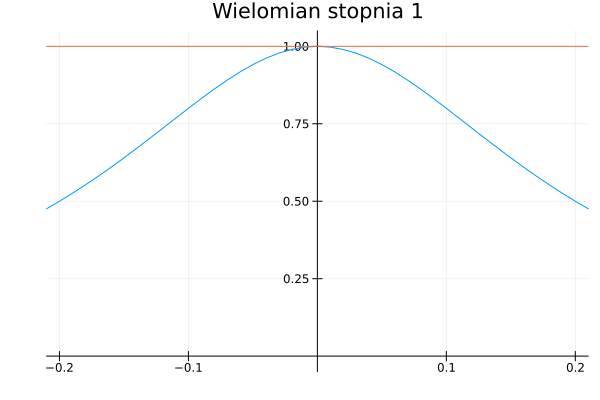

In [209]:
anim=@animate for i in 1:20
    plot(-1:0.01:1,x->1/(1+25x^2))
    plot!(-1:0.001:1,x->a[1:i+1]' * [x^i for i in 0:i])
    plot!(leg=false, title=@sprintf("Wielomian stopnia %0.0f",i), ylim=(-0.05, 1.05), framestyle=:origin)
    plot!(xlim=(-1/5-0.01, 1/5+0.01)) 
end
gif(anim, fps=3)

## Zad 3

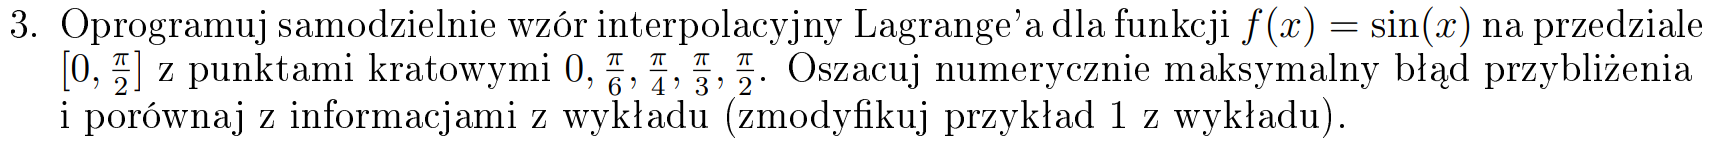

In [210]:
a=rand(1000);
@btime a[Not(3)];
@btime a[1:end .!= 3];
@btime a[eachindex(a) .!= 3];

  164.400 μs (5979 allocations: 179.31 KiB)
  1.150 μs (9 allocations: 8.17 KiB)
  1.140 μs (8 allocations: 8.14 KiB)


In [211]:
a=rand(100);
@btime a[Not(3)];
@btime a[1:end .!= 3];
@btime a[eachindex(a) .!= 3];

  16.400 μs (500 allocations: 16.36 KiB)
  251.268 ns (7 allocations: 1.00 KiB)
  235.897 ns (7 allocations: 1008 bytes)


In [212]:
Lagrange_poly(X,Y)=begin
    x-> Y' * (
        ([x    .- X[eachindex(X) .!= i] for i in eachindex(X)] .|> prod) ./ # wektor wektorów x-x_j oprócz wektora i,
        ([X[i] .- X[eachindex(X) .!= i] for i in eachindex(X)] .|> prod))
end

Lagrange_poly (generic function with 1 method)

In [213]:
inter= π ./ [Inf, 6,4,3,2]

5-element Vector{Float64}:
 0.0
 0.5235987755982988
 0.7853981633974483
 1.0471975511965976
 1.5707963267948966

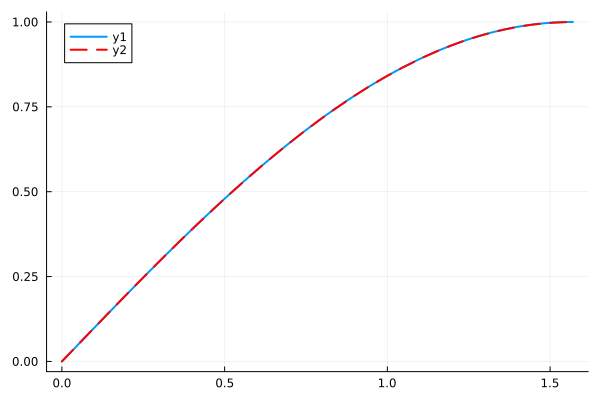

In [214]:
plot(inter[1]:0.01:inter[end],Lagrange_poly(inter, sin.(inter)), w=2)
plot!(sin, line=:dash, c=:red, w=2)

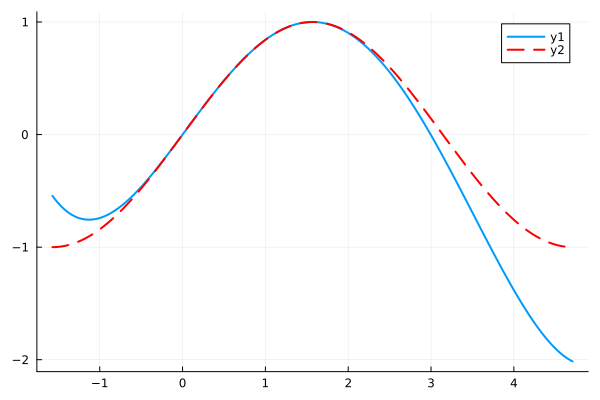

In [215]:
plot(-π/2:0.01:3/2*π,Lagrange_poly(inter, sin.(inter)), w=2)
plot!(sin, line=:dash, c=:red, w=2)

$$|f(x)-W(x)|\leq \frac{M_{n+1}}{(n+1)!} |\omega_n(x)|,$$
gdzie </br>
$M_{n+1}=\sup_{x\in[x_0,x_n]} |f^{(n+1)}(x)|$</br>
$\omega_{n}(x)=\prod_{i=0}^n (x-x_i)$

$|f^{(5)}(x)|=|\cos(x)|\leq 1$ (osiągane w 0)

$|\omega(x)|\leq \prod_{i=0}^n \max\{x_i-x_0, x_n-x_i\}$ (odległość do x jest zawsze mniejsza niż odległość do jednego z końców)

In [216]:
maximum(hcat(inter .-inter[1], inter[end] .- inter),dims=2) |> prod

2.1251366998977876

Zatem $ |\sin(x) - W_n(x)|\leq 0.018$

In [217]:
ans/factorial(5)

0.01770947249914823

W praktyce:

In [218]:
(Lagrange_poly(inter, sin.(inter)).(inter[1]:0.01:inter[end]) .- sin.(inter[1]:0.01:inter[end])) .|> abs |> maximum

0.00028897515274795005

Dziołczy!

Dokładniejsze oszacowanie:

In [219]:
err_estim_lagran(x)= ((x.-inter) |> prod |> abs)/factorial(5) 

err_estim_lagran (generic function with 1 method)

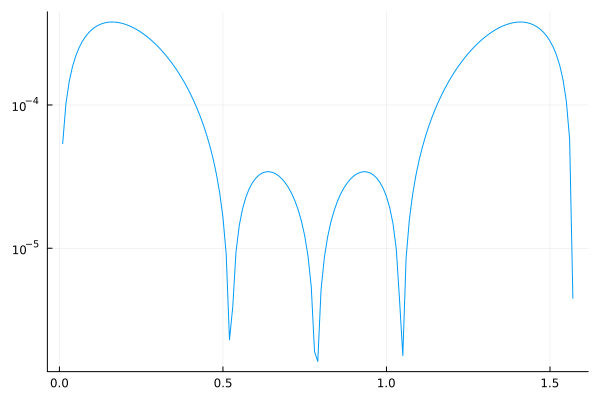

In [220]:
plot(inter[1]+0.01:0.01:inter[end], err_estim_lagran.(inter[1]+0.01:0.01:inter[end]) .+ eps(), yscale=:log10, leg=false)

## Zad 4

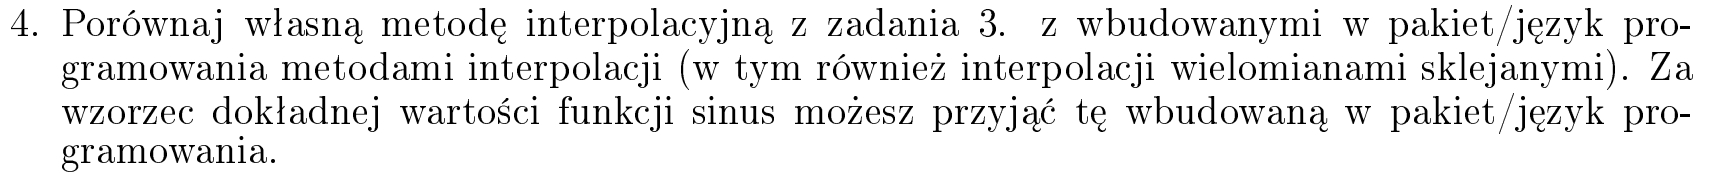

In [221]:
X=@pipe rand(4) *6 |> append!(_,[0,6],) |> sort
Y=sin.(X);
inter=0:0.01:6;

In [222]:
X

6-element Vector{Float64}:
 0.0
 1.6829082323018654
 2.737470310623908
 3.146445351235446
 4.6489530671751975
 6.0

### Polynomials -- wielomianem

In [223]:
using Polynomials

In [224]:
Polynomials.fit(X,Y)

Polynomial(0.7776893663885494*x + 0.40854383385036386*x^2 - 0.45774008230957763*x^3 + 0.09912246460059218*x^4 - 0.006332817137171043*x^5)

In [225]:
a=Polynomials.fit(X,Y).coeffs

6-element Vector{Float64}:
  0.0
  0.7776893663885494
  0.40854383385036386
 -0.45774008230957763
  0.09912246460059218
 -0.006332817137171043

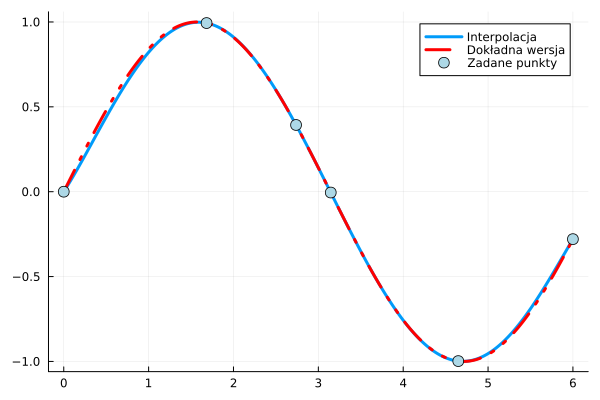

In [226]:
plot(inter,x->f(x,a), label="Interpolacja", w=3)
plot!(inter, sin, label="Dokładna wersja", c=:red, series=:dash, line=:dashdotdot, w=3)
scatter!(X,x->f(x,a), label="Zadane punkty",marker=6, c=:lightblue)

### Interpolation -- sklejanymi 0 i 1 stopnia

In [227]:
using Interpolations

In [228]:
interpolat_const=interpolate((X,), Y, Gridded(Constant())) # Jeżeli chcemy stopnia 2 lub 3 to wektor X musi być rozłożony regularnie
interpolat_line=interpolate((X,), Y, Gridded(Linear()));   # (w punktach {1,2,...,n} lub a:h:b i przeskalowany przy pomocy 'scale') 

In [229]:
interpolat_line(6.1)

LoadError: BoundsError: attempt to access 6-element interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())) with element type Float64 at index [6.1]

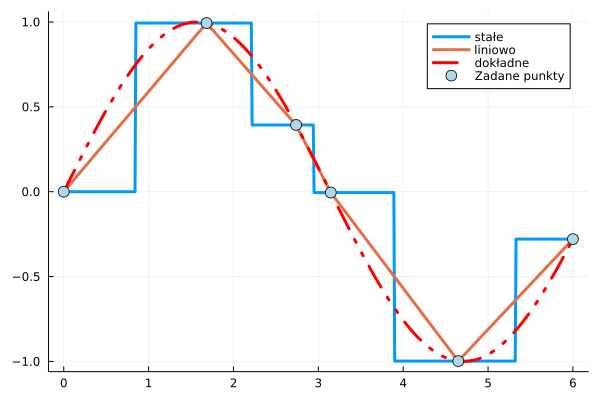

In [230]:
plot(X[1]:0.01:X[end], x->interpolat_const(x),l=3, label="stałe")
plot!(X[1]:0.01:X[end], x->interpolat_line(x),l=3, label="liniowo")
plot!(X[1]:0.01:X[end], sin, w=3, line=:dashdotdot, c=:red, label="dokładne")
scatter!(X,x->f(x,a), label="Zadane punkty",marker=6, c=:lightblue)

### Dierckx -- pozostałe

In [231]:
using Dierckx

In [232]:
spline(k) = Spline1D(X, Y, k=k)

spline (generic function with 1 method)

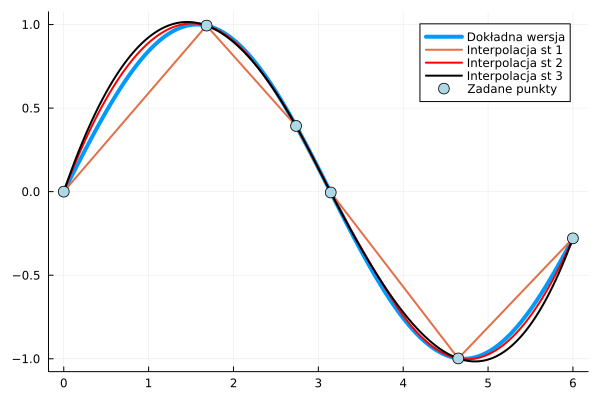

In [233]:
plot(inter, sin, label="Dokładna wersja", series=:dash, line=:solid, w=4)
plot!(inter,x->spline(1)(x), label="Interpolacja st 1", l=2)
plot!(inter,x->spline(2)(x), label="Interpolacja st 2", w=2, c=:red)
plot!(inter,x->spline(3)(x), label="Interpolacja st 3", w=2, c=:black)
#scatter!(X,x->sin, label="Zadane punkty",marker=6, c=:lightblue)
scatter!(X,x->sin(x), label="Zadane punkty",marker=6, c=:lightblue)

### LsqFit

In [234]:
using LsqFit
using SpecialMatrices

In [235]:
model(n)= (x,a) -> @pipe  Vandermonde(x) * a
fit = curve_fit(model(length(X)), X, Y, zeros(length(X)))

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([-1.4483912220296622e-16, 0.7776893663887872, 0.4085438338500558, -0.45774008230944035, 0.09912246460056696, -0.0063328171371694105], [-1.4483912220296622e-16, 1.6653345369377348e-15, -6.439293542825908e-15, 3.3350058825654116e-15, -2.220446049250313e-16, -2.4868995751603507e-14], [1.0 0.0 … 0.0 0.0; 1.0000000000235538 1.6829082323118234 … 8.021244222793099 13.499017935808936; … ; 1.0000000000235538 4.648953066886908 … 467.11159455393226 2171.579880214977; 1.0000000006102503 6.000000000141323 … 1296.0000000000175 7776.000000000692], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

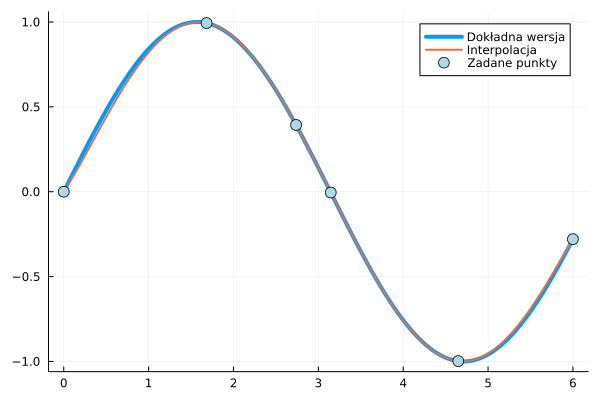

In [236]:
plot(inter, sin, label="Dokładna wersja", series=:dash, line=:solid, w=4)
plot!(inter,x->f(x,coef(fit)), label="Interpolacja", l=2)
#scatter!(X,x->sin, label="Zadane punkty",marker=6, c=:lightblue)
scatter!(X,x->sin(x), label="Zadane punkty",marker=6, c=:lightblue)

### Własna

In [237]:
a_own=interpolacjon(X,Y)

6-element Vector{Float64}:
  0.0
  0.777689366388629
  0.4085438338502546
 -0.45774008230952784
  0.09912246460058304
 -0.006332817137170456

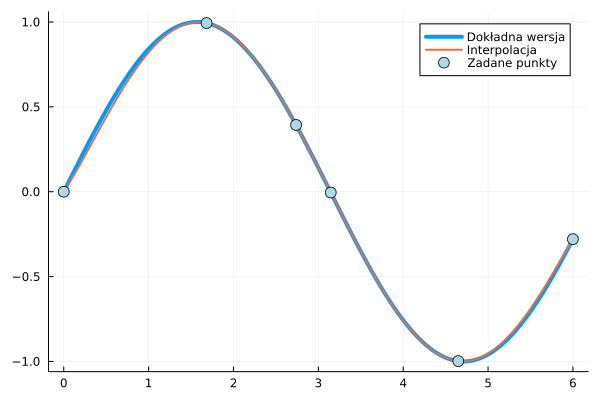

In [238]:
plot(inter, sin, label="Dokładna wersja", series=:dash, line=:solid, w=4)
plot!(inter,x->f(x,a_own), label="Interpolacja", l=2)
#scatter!(X,x->sin, label="Zadane punkty",marker=6, c=:lightblue)
scatter!(X,x->sin(x), label="Zadane punkty",marker=6, c=:lightblue)

In [239]:
hcat(a,coef(fit), a_own)

6×3 Matrix{Float64}:
  0.0         -1.44839e-16   0.0
  0.777689     0.777689      0.777689
  0.408544     0.408544      0.408544
 -0.45774     -0.45774      -0.45774
  0.0991225    0.0991225     0.0991225
 -0.00633282  -0.00633282   -0.00633282

# Śmieci